In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
from plotutils import *
rc('text', usetex=True)

# parameter tuning

In [2]:
date = '10_02_2021'
tol = 1e-5

In [3]:
lee = get_all(logdir='../IPG/test/log', date=[date], inexact_type='lee', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]) 
lee_time = collect_time(lee)

lee-0.1
 67/72 instances terminate with status:  0
  5/72 instances terminate with status:  4
lee-0.2
 67/72 instances terminate with status:  0
  5/72 instances terminate with status:  4
lee-0.3
 68/72 instances terminate with status:  0
  4/72 instances terminate with status:  4
lee-0.4
 68/72 instances terminate with status:  0
  4/72 instances terminate with status:  4
lee-0.5
 68/72 instances terminate with status:  0
  4/72 instances terminate with status:  4
lee-0.6
 68/72 instances terminate with status:  0
  4/72 instances terminate with status:  4
lee-0.7
 67/72 instances terminate with status:  0
  5/72 instances terminate with status:  4
lee-0.8
 66/72 instances terminate with status:  0
  6/72 instances terminate with status:  4
lee-0.9
 66/72 instances terminate with status:  0
  6/72 instances terminate with status:  4


In [4]:
# lee = get_all(logdir='../IPG/test/log', date=date, inexact_type='lee', loss='logit', use_ckpt=True, tol = tol, 
#         lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], excludes=['madelon'], param_lst=[0.1, 0.2, 0.3, 0.4, 0.5])
ppf = PerformanceProfile(lee)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
lee_best = get_best(pools)
print('Best params:', lee_best)

All algorithms failed in 0 instances (failure code [-2])
Metrics for failed instances are overwritten with np.inf
After subsetting, 72 instances are kept.
Best params: lee-0.9


In [7]:
lee_best

'lee-0.9'

In [8]:
leelee = get_all(logdir='../IPG/test/log', date=[date], inexact_type='lee', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], param_lst=[0.9])

lee-0.9
 66/72 instances terminate with status:  0
  6/72 instances terminate with status:  4


In [9]:
ydlee = get_all(logdir='../IPG/test/log', date=['09_30_2021'], inexact_type='yd', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], param_lst=[0.2])

yd-0.2
 71/72 instances terminate with status:  0
  1/72 instances terminate with status:  4


In [10]:
pair_wise_comparison(ydlee['yd-0.2'], leelee[lee_best], suffixes_lst=['ydlee', 'leelee'])

For ydlee-leelee comparsion:
 In terms final F:
  better:4 | same:67 | worse: 1
 In terms #z:
  better:0 | same:67 | worse: 5


(0, 67, 5, 4, 67, 1)

In [8]:
# final = {}
# final['yd-0.2'] = ydlee['yd-0.2']
# final[lee_best] = leelee[lee_best]
# ppf = PerformanceProfile(final, failcode=4)
# ppf.get_subset_by_time(threshold=1, remove_failed=True)
# _ = ppf.plot(column='time',show_num=False, options={'ratio_max':6}, save=False, saveDir='./natOG/', labels=['option I\ \ \ ', 'option II\ \ ', 'option III'])

# Plots

In [11]:
lee_best = 'lee-0.9'

In [14]:
leelee = get_all(logdir='../IPG/test/log', date=['10_02_2021','10_04_2021'], inexact_type='lee', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], param_lst=[0.9])

lee-0.9
 104/132 instances terminate with status:  0
   6/132 instances terminate with status:  4
  13/132 instances terminate with status:  1
   9/132 instances terminate with status:  2


In [15]:
ydlee = get_all(logdir='../IPG/test/log', date=['09_30_2021','09_28_2021', '09_29_2021'], inexact_type='yd', loss='logit', use_ckpt=True, tol = tol, 
        lam_shrink=[0.1, 0.01], group_size=[10, 100], overlap_ratio=[0.1, 0.2, 0.3], param_lst=[0.2])

yd-0.2
 108/132 instances terminate with status:  0
   1/132 instances terminate with status:  4
  16/132 instances terminate with status:  1
   7/132 instances terminate with status:  2


In [16]:
cols = ['datasetid', 'F', 'time', 'nz']
lee_df = leelee[lee_best][cols].copy()
yd_df = ydlee['yd-0.2'][cols].copy()

In [17]:
pair_wise_comparison(yd_df, lee_df, suffixes_lst=['yd', 'lee'])

For yd-lee comparsion:
 In terms final F:
  better:22 | same:104 | worse: 6
 In terms #z:
  better:1 | same:121 | worse: 10


(1, 121, 10, 22, 104, 6)

All algorithms failed in 23 instances (failure code [1, 2, 4])
Metrics for failed instances are overwritten with np.inf
After subsetting, 109 instances are kept.
ydlee-0.2 Win:52 | Lose:42


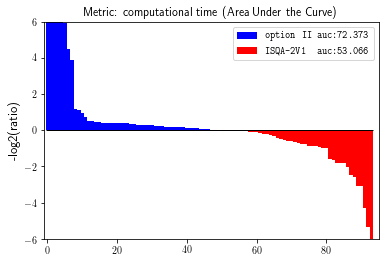

In [19]:
final = {}
final['ydlee-0.2'] = ydlee['yd-0.2']
final['leelee-0.5'] = leelee[lee_best]
ppf = PerformanceProfile(final, failcode=[1,2,4])
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='time',show_num=False, options={'ratio_max':6}, save=True, saveDir='./natOG/', labels=['option II', 'ISQA-2V1\ \ '])

In [23]:
# df12_merged = pd.merge(ydlee['yd-0.2'], leelee['lee-0.5'], on='datasetid', 
#                            suffixes=('ydlee', 'leelee'), how='left')
# # df12_merged[['datasetid', 'statusydlee', 'statusleelee', 'timeydlee', 'timeleelee', 'nzydlee', 'nzleelee', 'nnzydlee', 'nnzleelee']].head(60)
# df12_merged[df12_merged['nzydlee'] < df12_merged['nzleelee']][['datasetid', 'statusydlee', 'statusleelee', 'timeydlee', 'timeleelee', 'nzydlee', 'nzleelee', 'nnzydlee', 'nnzleelee']]